# Installing Dependencies

Uncomment if these are not already installed.

In [16]:
#!pip install astropy 
#!pip install numpy 
#!pip install matplotlib
#!pip install spectral-cube 
#!pip install regions
#!pip install astroquery
#!pip install astropixel

# Importing Dependencies

In [17]:
import astropixel
from astropixel import catalog_querry
from astropixel import plot_stars
from astropixel import make_star
from astropixel.make_star import GaussianCrossPSF

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table

# What is AstroPixel?

AstroPixel was made with the goal of making pixel art out of real astronomical data! 

This program will query a region of the sky given a coordinate and radius. Then, the user can plot the field as pixel art. 

Let's run through an example of how to use AstroPixel. 

First, choose a coordinate to query. You can either make a SkyCoord object or utilize AstroPixel's random coordinate generator.

In [19]:
coord = SkyCoord.from_name('Barnard\'s Star') # Coordinates of Barnard's Star
#coord = SkyCoord('05h35m17.3s -05d23m28s', frame='icrs') # Coordinates of Barnard's Star
#coord = catalog_querry.get_random_coordinates_() # A random coordinate in the whole sky (Warning: More likely to query an empty region)
#coord = catalog_querry.get_random_coordinates_gal() # A random coordinate in the galactic plane

Next, initialize the StarPlotter object. Choose an image `size` and the `radius` of the queried field on the sky. 

In [20]:
plotter = plot_stars.StarPlotter(coord, size=(50, 50), radius=1*u.arcmin)

Now, let's see where the stars are. Let's use a scatter plot first to see where the stars are.

For all of the plotting functions, you can turn the labels on and off. They are off by default for the best images!

<WCSAxes: >

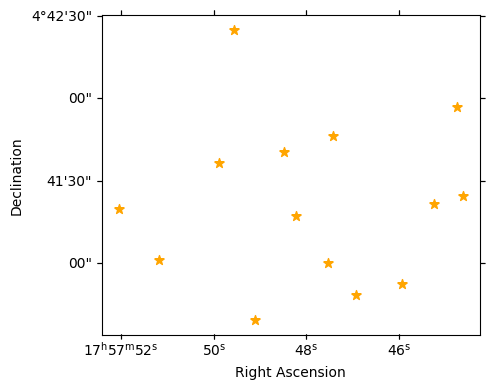

In [21]:
plotter.plot_scatter_field(labels=True)

Now let's try some pixel art!

<WCSAxes: >

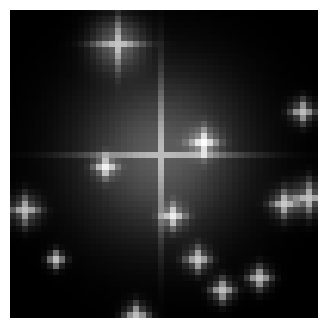

In [22]:
plotter.plot_cross_psf_field()

Looks great! But greyscale is a bit boring. Luckily, AstroPixel can make its colors RGB!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5.3706188121184724e-05..1.1026433891720833].


<WCSAxes: >

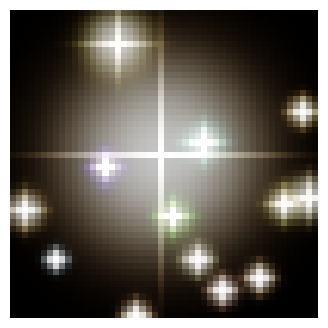

In [23]:
plotter.plot_cross_psf_field_rgb()

Astropixel images aren't limited to square images!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1.8031848779804963e-11..1.0760415299857786].


<WCSAxes: >

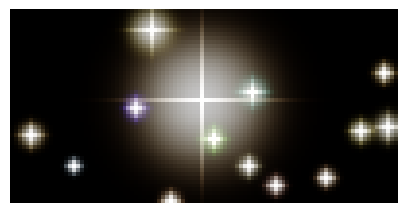

In [24]:
rect_plotter = plot_stars.StarPlotter(coord, size=(100, 50), radius=1*u.arcmin)

rect_plotter.plot_cross_psf_field_rgb()

Plus, these images still have the correct coordinates for the stars...

Also, the plotting functions return their Axes, which is nice for customizing your pixelart!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1.8031848779804963e-11..1.0760415299857786].


<WCSAxes: >

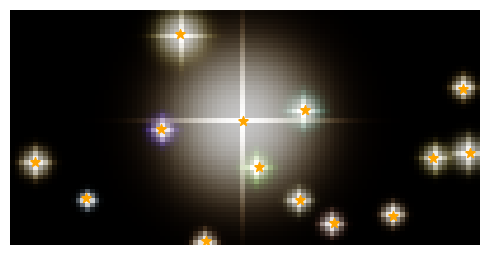

In [25]:
ax = rect_plotter.plot_cross_psf_field_rgb()
rect_plotter.plot_scatter_field(ax=ax)

# Using Other Catalogs

AstroPixel uses the 2MASS catalog by default, but you can use other catalogs available on Vizier. Just be aware that not all catalogs have enough magntiudes available to make an RGB image out of. 

For an example of another catalog coded into AstroPixel, let's look at SDSS.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.2305636958600126].


imag gmag umag
imag rmag umag


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.2305636958600126].


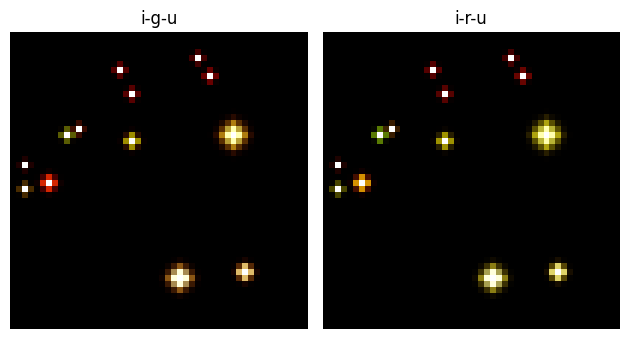

In [26]:
# You can change the catalog queried by setting the catalog_name parameter. 
plotter_SDSS = plot_stars.StarPlotter(coord, size=(50, 50), radius=0.5*u.arcmin, catalog_name='SDSS')

ax1 = plt.subplot(121, projection=plotter_SDSS.wcs)
ax2 = plt.subplot(122, projection=plotter_SDSS.wcs)

# You can check and see which columns of the catalog query are being used by the plotter using the object's attributes. 
print(plotter_SDSS.R, plotter_SDSS.G, plotter_SDSS.B)
plotter_SDSS.plot_cross_psf_field_rgb(ax=ax1)
ax1.set_title('i-g-u')

# You can also set the columns to be used.
plotter_SDSS.G = 'rmag'
print(plotter_SDSS.R, plotter_SDSS.G, plotter_SDSS.B)

plotter_SDSS.plot_cross_psf_field_rgb(ax=ax2)
ax2.set_title('i-r-u')

plt.tight_layout()
plt.show()

Okay, but what if you want to use a different catalog, one that isn't implemented by AstroPixel? 

In [27]:
# You can query any catalog available in Vizier by setting the catalog_name parameter to the desired catalog's name.
# The catalog's name must be a valid Vizier catalog name. You can check the available catalogs in Vizier's website.
# Note that if the catalog is not available in Vizier, the query will return an empty table, and the code will select 
# the default 2MASS catalog instead. 

#coord = SkyCoord('17:56:14.5444133448', '-28:02:05.654852376', unit=(u.hourangle, u.deg))
#coord = SkyCoord(l=0.0, b=0.0, unit=(u.deg, u.deg), frame='galactic') # Coordinates of the galactic center
#coord = SkyCoord('00h42m44.3303s +41d16m08.834s', frame='icrs') # Coordinates of M31
coord = catalog_querry.get_random_coordinates_gal() # A random coordinate in the whole sky (Warning: More likely to query an empty region)

# Let's try querying the catalog II/349
plotter_ex = plot_stars.StarPlotter(coord.icrs, size=(100, 100), radius=1*u.arcmin, catalog_name='II/349')

In [28]:
# Trying to plot the catalog will return an error, as the columns used for the R, G, B, RA, and DEC must be set manually.
# You can check the available columns in the table by printing the table columns.
print(plotter_ex.cat.columns)

<TableColumns names=('RAJ2000','DEJ2000','objID','f_objID','Qual','e_RAJ2000','e_DEJ2000','_tab1_10','Ns','Nd','gmag','e_gmag','gKmag','e_gKmag','gFlags','rmag','e_rmag','rKmag','e_rKmag','rFlags','imag','e_imag','iKmag','e_iKmag','iFlags','zmag','e_zmag','zKmag','e_zKmag','zFlags','ymag','e_ymag','yKmag','e_yKmag','yFlags')>


In [29]:
# Now let's set the columns to be used.

plotter_ex.R = 'imag'
plotter_ex.G = 'rmag'
plotter_ex.B = 'gmag'

plotter_ex.RA = 'RAJ2000'
plotter_ex.DEC = 'DEJ2000'


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0005326963342245].


<WCSAxes: >

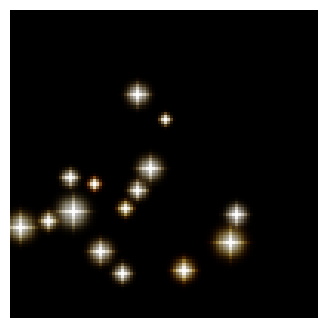

In [30]:
plotter_ex.plot_cross_psf_field_rgb()

Random Star Fields

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [7.849039630635252e-50..1.0001954856621134].


<WCSAxes: >

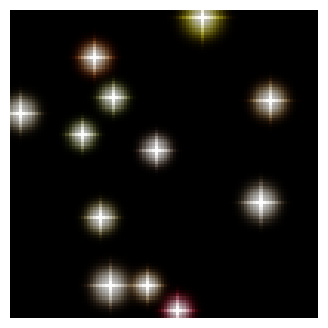

In [57]:
coord = catalog_querry.get_random_coordinates_gal()
plotter_random = plot_stars.StarPlotter(coord.icrs, size=(100, 100), radius=30*u.arcsec)
plotter_random.plot_cross_psf_field_rgb()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.2586848468258777e-77..1.367925998040968].


<WCSAxes: >

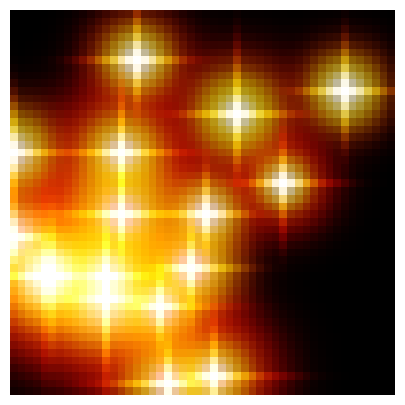

In [53]:
coord = SkyCoord.from_name('Galactic Center')
plotter_glob = plot_stars.StarPlotter(coord.icrs, size=(50, 50), radius=15*u.arcsec)
plotter_glob.figsize = (5, 5)
plotter_glob.plot_cross_psf_field_rgb(labels=False)